In [40]:
import numpy as np
import cv2
import os
import time
import Helpers
import Localization
import Segment

In [2]:
# Load Image
path = 'dataset/Frames/Category_I/'
name = 'plate4.jpg'
img = cv2.imread(path+name)

0.01715230941772461


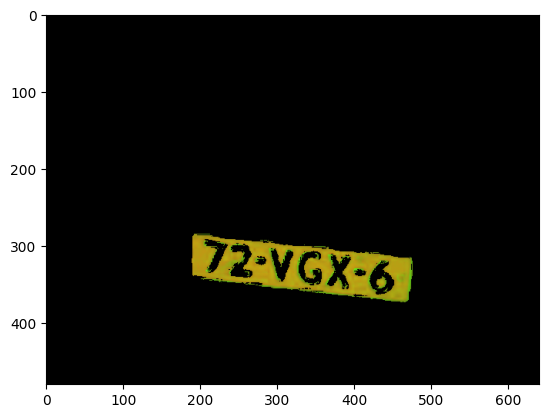

In [3]:
start = time.time()
masked1 = Localization.masked_image(img, 13, 28, 136,246,89, 240)
end = time.time()-start
print(end)
Helpers.plotImage(masked1)

0.01669764518737793


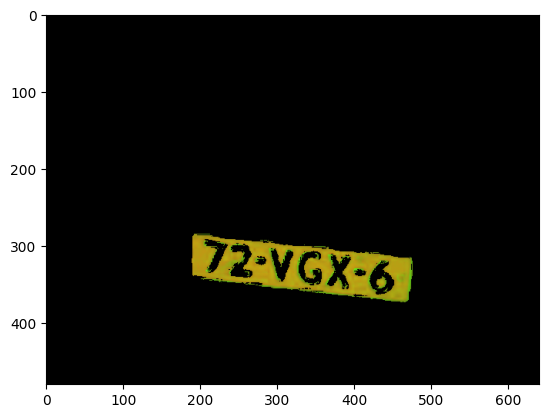

In [4]:
start = time.time()
masked2 = Localization.mask_better(img, 13, 28, 136,246,89, 240)
end = time.time()-start
print(end)
Helpers.plotImage(masked2)

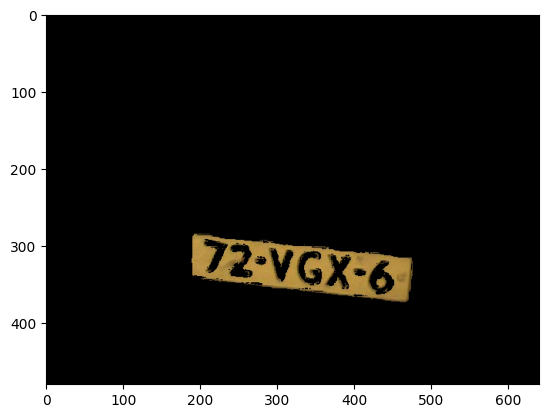

In [5]:
bgr = cv2.cvtColor(masked2, cv2.COLOR_HSV2BGR)
Helpers.plotImage(bgr)

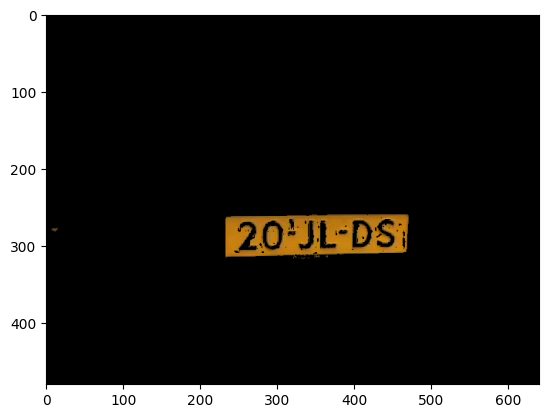

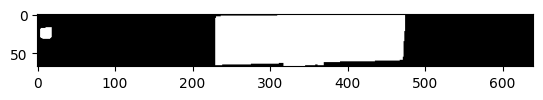

In [74]:
def crop_plates_better(masked, original):
    """
    This function, given a masked image, crops the parts of the image that contain license plates.
    It returns a list of the cropped images.
    """
    bgr = cv2.cvtColor(masked, cv2.COLOR_HSV2BGR)
    binary = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    binary[binary > 50] = 255
    binary = Helpers.close(binary)

    rows = np.count_nonzero(binary, axis = 1)
    removed = Segment.remove_black_rows(binary)
    return removed

name = 'plate32.jpg'
img = cv2.imread(path+name)
masked = Localization.masked_image(img, 13, 28, 136,246,89, 240)
Helpers.plotImage(cv2.cvtColor(masked, cv2.COLOR_HSV2BGR))
croped = crop_plates_better(masked, img)
Helpers.plotImage(croped, cmapType='gray')